In [1]:
import matplotlib.pyplot as plt
import numpy as np

from thermohl import solver
from thermohl.solver.enums.temperature_location import TemperatureLocation
from thermohl.solver.enums.heat_equation_type import HeatEquationType
from thermohl.solver.enums.variable_type import VariableType
from thermohl.solver.enums.power_type import PowerType

This function plots all three temperatures (surface, core, average) of a conductor, its ampacity and solar heating during a day. As excpected, we use the 3t solver this time, but with CIGRE power terms. We can observe that when the solar heating increases, all three temperatures of the conductor increase also while the ampacity of the conductor decreases.There are no huge differences between surface and core temperatures in this case.

In [2]:
def example_solver3t(dic):
    # create solver with cigre power terms and 3t heat equation
    slvr = solver.cigre(dic, heat_equation=HeatEquationType.WITH_THREE_TEMPERATURES)

    # compute temperature
    dtemp = slvr.steady_temperature()

    # compute max intensity
    Trep = 55.0
    damp = slvr.steady_intensity(Trep)

    # plot results
    fig, ax = plt.subplots(nrows=3, ncols=1)
    ax[0].fill_between(
        slvr.args.hour, dtemp[TemperatureLocation.SURFACE], dtemp[TemperatureLocation.CORE], fc="gray", alpha=0.33, ec=None
    )
    ax[0].plot(
        slvr.args.hour,
        dtemp[TemperatureLocation.SURFACE],
        c="C0",
        label="Surface Conductor temperature (C)",
    )
    ax[0].plot(
        slvr.args.hour,
        dtemp[TemperatureLocation.AVERAGE],
        c="C1",
        label="Average Conductor temperature (C)",
    )
    ax[0].plot(
        slvr.args.hour, dtemp[TemperatureLocation.CORE], c="C3", label="Core Conductor temperature (C)"
    )
    ax[0].axhline(Trep, ls="--", c="C1", label="Maximum temperature for ampacity")
    ax[1].plot(slvr.args.hour, dic[VariableType.TRANSIT.value], c="C0", label="Transit (A)")
    ax[1].plot(slvr.args.hour, damp[VariableType.TRANSIT], c="C1", label="Conductor ampacity (A)")
    ax[2].plot(slvr.args.hour, dtemp[PowerType.SOLAR], label="Solar heating power (W/m)")
    for i in range(3):
        ax[i].grid(True)
        ax[i].legend()
    ax[2].set_xlabel("Hour")
    %matplotlib inline
    plt.show()

In [3]:
import matplotlib

matplotlib.use("TkAgg")
plt.close("all")

# Generate input dict (for the sake of simplicity, only a few inputs are
# used, the rest is filled with default values).
dic = dict(
    latitude=46.1,
    altitude=123.0,
    azimuth=31.0,
    month=6,
    day=20,
    hour=np.linspace(0.0, 23.0, 24),
    transit=np.array([600.0 for i in range(12)] + [900.0 for i in range(12)]),
)

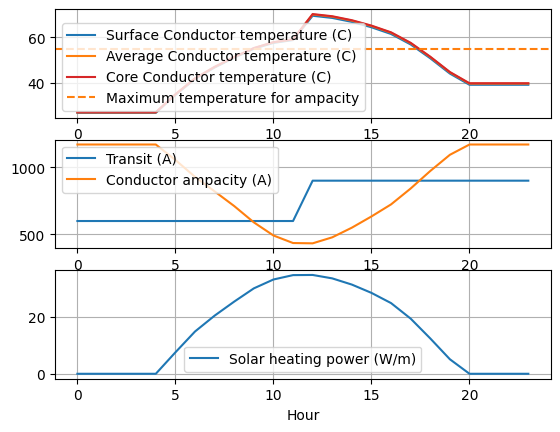

invalid command name "123344307139392process_stream_events"
    while executing
"123344307139392process_stream_events"
    ("after" script)


In [4]:
example_solver3t(dic)